# Basics of Neural Networks with scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Supporting function 

In [2]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title:
        ax.set_title(title)

## Generate Dummy Dataset

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Visualize the Dataset

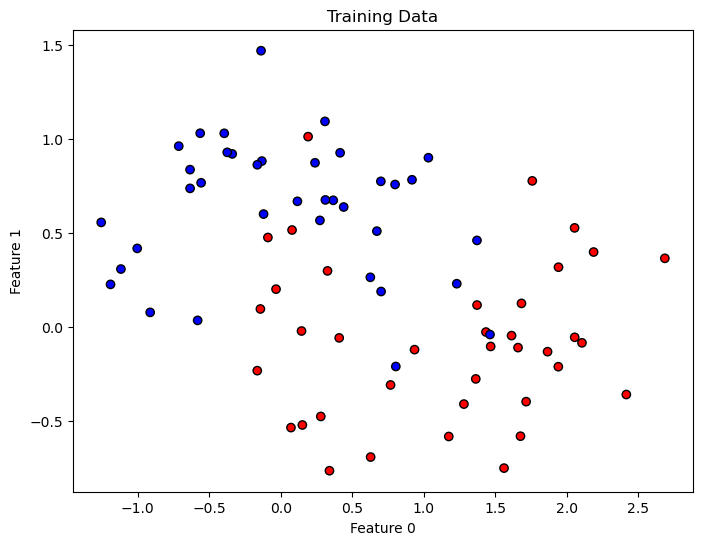

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.show()

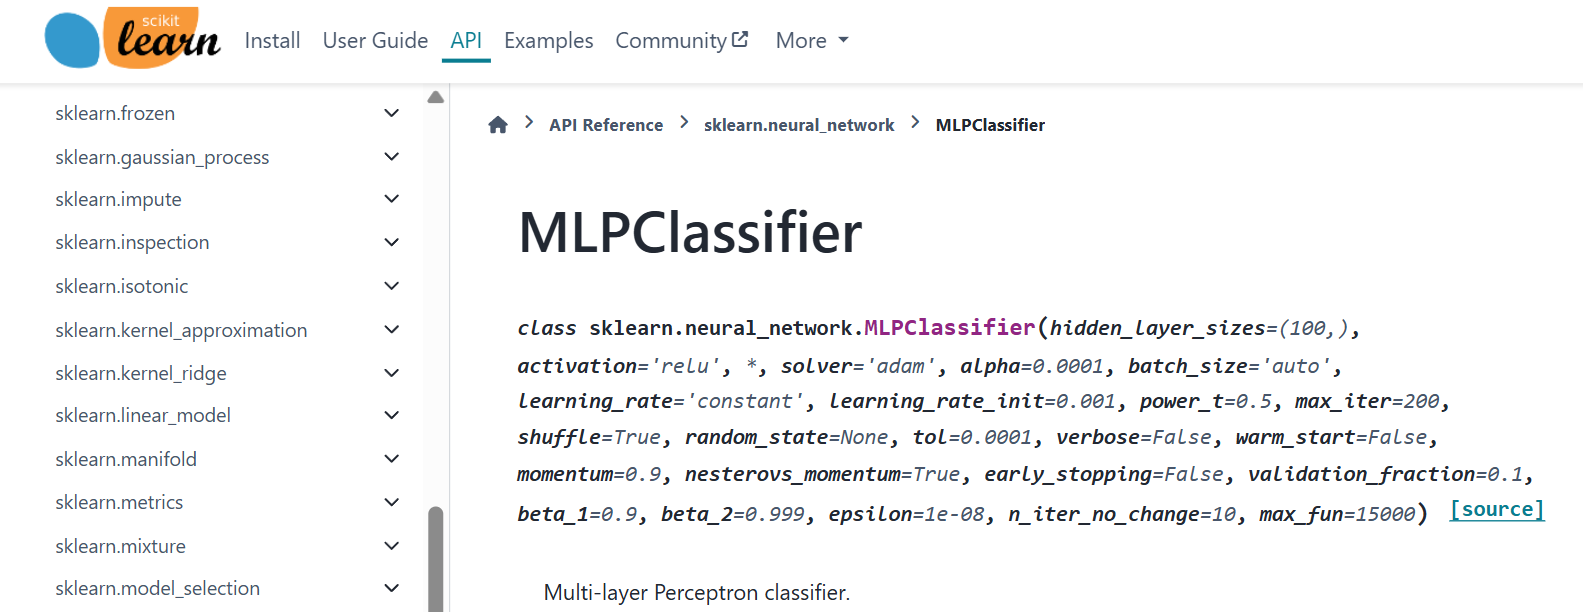

## First a Neural Network with a Single Hidden Layer and 5 Neurons

In [5]:
# Single hidden layer with 10 units
mlp_single = MLPClassifier(hidden_layer_sizes=[5], max_iter=200,
                           solver='sgd', random_state=0)
mlp_single.fit(X_train, y_train)

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[5], random_state=0, solver='sgd')

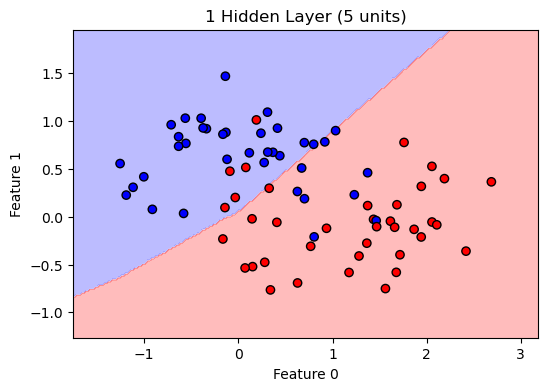

In [6]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_single, X_train, y_train, title='1 Hidden Layer (5 units)')
plt.show()

## First a Neural Network with a Single Hidden Layer and 10 Neurons

In [7]:
# Single hidden layer with 10 units
mlp = MLPClassifier(hidden_layer_sizes=[10], max_iter=200,
                    solver='sgd', random_state=0)
mlp.fit(X_train, y_train)

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='sgd')

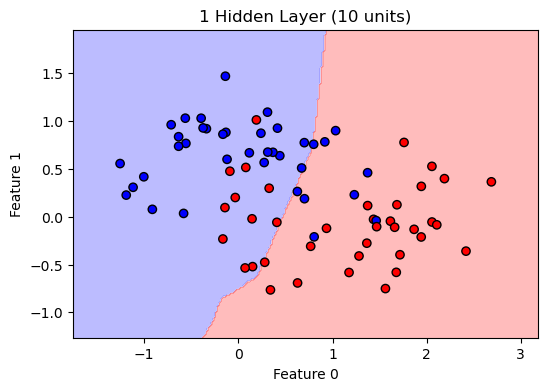

In [8]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp, X_train, y_train, title='1 Hidden Layer (10 units)')
plt.show()

## Fit a Neural Network with Two Hidden Layers

In [9]:
# Two hidden layers, each with 10 units
mlp_double = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=200,
                           solver='sgd', random_state=0)
mlp_double.fit(X_train, y_train)

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10, 10], random_state=0, solver='sgd')

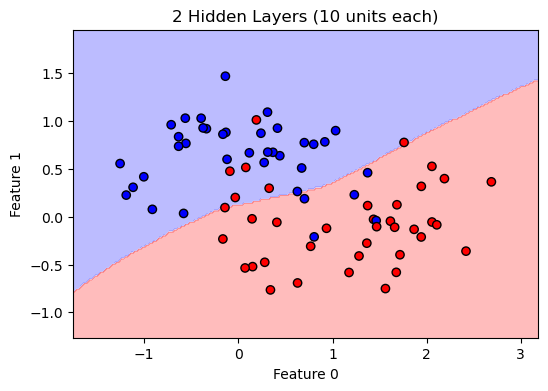

In [17]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_double, X_train, y_train, title='2 Hidden Layers (10 units each)')
plt.show()

## Fit a Deep Neural Network

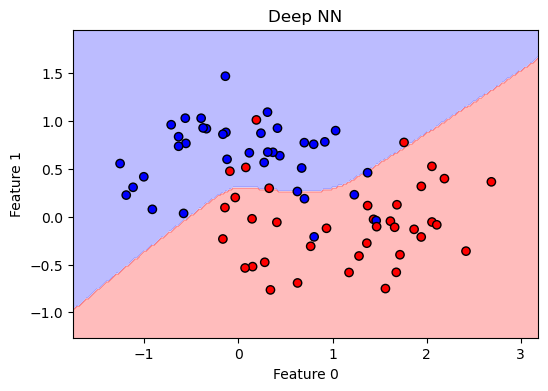

In [27]:
# Two hidden layers, each with 10 units
mlp_deep = MLPClassifier(hidden_layer_sizes=[1000, 500, 200, 100, 10], max_iter=2000,
                           solver='sgd')
mlp_deep.fit(X_train, y_train)

plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_deep, X_train, y_train, title='Deep NN')
plt.show()

## Try different architectures

In [43]:
def create_model(hidden_layer_sizes, max_iter=200, X=X, y=y):
    _mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                         solver='sgd')
    _mlp.fit(X, y)
    plt.figure(figsize=(6,4))
    plot_decision_boundary(mlp, X_train, y_train, title=f"{hidden_layer_sizes}")
    plt.show()

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


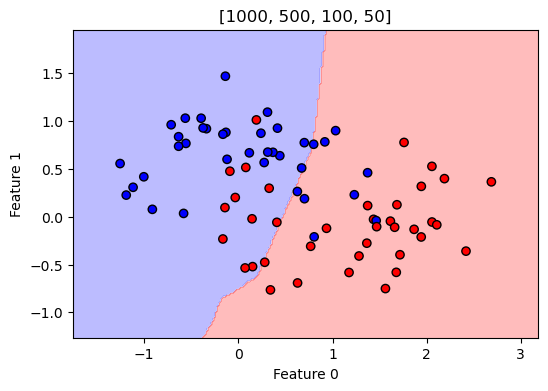

In [48]:
create_model(hidden_layer_sizes=[1000, 500, 100, 50], # Neural Network with multiple hidden layers
             max_iter=100
             )

Single-layer networks:

[10] → 1 hidden layer with 10 neurons (simple architecture)

[50] → 1 hidden layer with 50 neurons (moderate complexity)

[100] → 1 hidden layer with 100 neurons (deeper representation)

Multi-layer networks:

[(]50, 30] → 2 hidden layers with 50 and 30 neurons respectively

[100, 50, 25] → 3 hidden layers with decreasing neuron counts (useful for feature refinement)

[200, 100, 50] → A deep network with gradually decreasing layer sizes

Deeper setups:

[500, 250, 100] 

[10, 10, 10, 10, 10]

[1024, 512, 256, 128, 64] → Used for large-scale problems with high-dimensional data